# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [154]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [155]:
df_obesity = pd.read_csv("Datasets/obesity_cleaned.csv")

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [156]:
df_obesity['Obesity'] = df_obesity['Obesity (%)'].apply(lambda x: x.split()[0])
df_obesity.groupby('Obesity').sum()

,Unnamed: 0,Year
Obesity,,
0.1,705722,85078
0.2,1791097,279105
0.3,2246626,376427
0.4,2542889,440046
0.5,2473689,430377
...,...,...
9.6,1131623,185081
9.7,955530,159296
9.8,987976,175330


In [157]:
df_obesity.drop('Unnamed: 0', axis=1, inplace=True)

In [158]:
df_obesity.loc[df_obesity['Obesity'] == 'No', 'Obesity'] = np.nan

In [159]:
df_obesity['Obesity'] = df_obesity['Obesity'].dropna()

In [160]:
df_obesity['Obesity'] = df_obesity['Obesity'].apply(lambda x: float(x))
df_obesity['Year'] = df_obesity['Year'].apply(lambda x: int(x))

In [161]:
df_obesity.set_index('Year', inplace=True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [162]:
df_obesity[df_obesity.index == 2015].groupby('Sex').mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [163]:
df_obesity_start = df_obesity[df_obesity.index == 1975]
df_obesity_end = df_obesity[df_obesity.index == 2016]


In [164]:
df_obesity_start.set_index('Country',  inplace=True)
df_obesity_end.set_index('Country',  inplace=True)

In [165]:
df_obesity_ev = df_obesity_end[df_obesity_end['Sex'] == 'Both sexes']['Obesity'] - df_obesity_start[df_obesity_start['Sex'] == 'Both sexes']['Obesity']
df_obesity_ev

Country
Afghanistan                            5.0
Albania                               15.2
Algeria                               20.5
Andorra                               12.7
Angola                                 7.4
                                      ... 
Venezuela (Bolivarian Republic of)    16.0
Viet Nam                               2.0
Yemen                                 14.3
Zambia                                 6.6
Zimbabwe                              11.8
Name: Obesity, Length: 195, dtype: float64

In [166]:
df_obesity_ev.sort_values().dropna()

Country
Viet Nam         2.0
Singapore        3.1
Japan            3.3
Bangladesh       3.4
Timor-Leste      3.6
                ... 
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, Length: 191, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [167]:
df_2015 = df_obesity[df_obesity.index == 2015]
df_2015[df_2015['Obesity'] == df_2015['Obesity'].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

<AxesSubplot:xlabel='Year'>

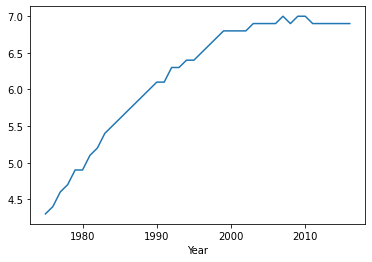

In [168]:
df_brasil = df_obesity[df_obesity['Country'] == 'Brazil']
(df_brasil[df_brasil['Sex'] == 'Female']['Obesity'] - df_brasil[df_brasil['Sex'] == 'Male']['Obesity']).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [169]:
df_both = df_obesity[df_obesity['Sex'] == 'Both sexes']

<AxesSubplot:xlabel='Year'>

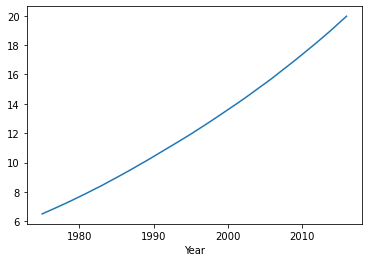

In [170]:
df_both.groupby('Year')['Obesity'].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [171]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [172]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


- Você conseguiria informar o primeiro valor registrado de cada país?

In [173]:
df_gdp[' GDP_pp '] = df_gdp[' GDP_pp '].apply(lambda x: x.replace(',','')).apply(lambda x: float(x))

In [174]:
df_gdp['Year'] = df_gdp['Year'].apply(lambda x: int(x.split('/')[2]))

df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [175]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   4419 non-null   object 
 1   Region    4419 non-null   object 
 2   Year      4419 non-null   int64  
 3    GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


In [176]:
df_gdp['GDP_pp'] = df_gdp[' GDP_pp ']
del df_gdp[' GDP_pp ']

df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [177]:
df_gdp.groupby('Country')['Year'].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [178]:
df_gdp.groupby('Country')['Year'].min().value_counts()

1901    192
1991      1
Name: Year, dtype: int64

In [179]:
df_gdp.groupby('Country')['Year'].min()[df_gdp.groupby('Country')['Year'].min() == '1991']

Series([], Name: Year, dtype: int64)

In [180]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4419 non-null   object 
 1   Region   4419 non-null   object 
 2   Year     4419 non-null   int64  
 3   GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


In [181]:
df_gdp[df_gdp['Year'] < 2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
GDP_pp               118681.3
dtype: object

In [182]:
df_gdp_start = df_gdp[df_gdp['Year'] == 1901]
df_gdp_end = df_gdp[df_gdp['Year'] == 1996]

In [183]:
((df_gdp_end.groupby('Region')['GDP_pp'].mean() / df_gdp_start.groupby('Region')['GDP_pp'].mean() - 1)*100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: GDP_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [184]:
arr_year = np.arange(df_gdp['Year'].min(), df_gdp['Year'].max())
df_all_years = pd.DataFrame(arr_year, columns=['Year'])
df_all_years.index = df_all_years['Year']

df_years_off = ~df_all_years['Year'].isin(df_gdp['Year'])
df_years_off = df_all_years.loc[df_years_off].index

In [185]:
df_years_off

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [186]:
df_gdp = df_gdp.sort_values(['Country', 'Year'])
df_gdp['delta_gdp'] = df_gdp['GDP_pp'] - df_gdp['GDP_pp'].shift(1)
df_gdp['delta_year'] = df_gdp['Year'] - df_gdp['Year'].shift(1)
df_gdp['gdp_year'] = (df_gdp['delta_gdp'] / df_gdp['delta_year']).shift(-1)

In [187]:
df_gdp['next_year'] = df_gdp['Year'].shift(-1)
del df_gdp['delta_gdp'], df_gdp['delta_year']

In [188]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0
...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,-0.118,1996.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-12.308,2001.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-39.958,2006.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,1.232,2011.0


In [189]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row['Year'] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row['next_year']) & (df_years_off > row['Year'])]

    for new_year in years_to_add:
        add_row = row.copy()
        add_row['GDP_pp'] = (new_year - add_row['Year']) * add_row['gdp_year'] + add_row['GDP_pp']
        add_row['Year'] = new_year
        add_row['kind'] = 'estimated'
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [190]:
df_new_data

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [191]:
df_gdp = pd.concat([df_gdp, df_new_data])
df_gdp.sort_values(['Country', 'Year'], inplace=True)
df_gdp.index = df_gdp['Year']

In [192]:
df_gdp['kind'].fillna('real', inplace=True)

In [193]:
df_gdp

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


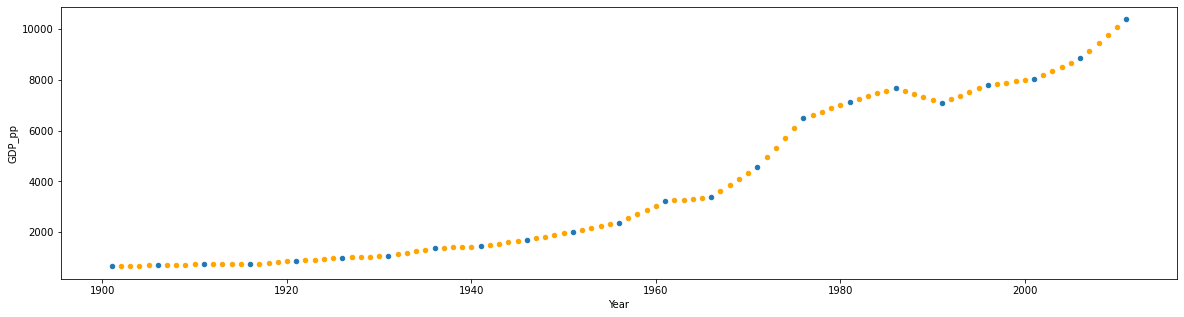

In [194]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,5))

country = 'Brazil'

df_gdp[(df_gdp['kind'] == 'real') & (df_gdp['Country'] == country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax)
df_gdp[(df_gdp['kind'] == 'estimated') & (df_gdp['Country'] == country)].plot(kind='scatter', y='GDP_pp', x='Year', ax=ax, color='orange');

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

In [195]:
df_gdp['Year'] = df_gdp['Year'].astype(int)
df_gdp['GDP_pp'] = df_gdp['GDP_pp'].astype(float)

In [203]:
!pip install plotly


^C


In [207]:
import plotly.express as px

df = px.data.gapminder() ## dataset com os valores de código de país
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [210]:
dict_iso_alpha = df.set_index('country').to_dict()['iso_alpha']
dict_num = {j: i for i, j in enumerate(df_gdp['Country'].unique())}

df_gdp['iso_alpha'] = df_gdp['Country'].map(dict_iso_alpha)
df_gdp['iso_num'] = df_gdp['Country'].map(dict_num)

fig = px.choropleth(df_gdp[df_gdp['kind'] == 'real'].reset_index(drop=True), locations='iso_alpha',color='GDP_pp', hover_name='Country', animation_frame='Year')

fig.update_layout(height=600)
fig.show()

- Há uma relação entre níveis de obesidade e gdp per capita?

In [211]:
df_obesity['country-year'] = df_obesity['Country'] + '-' + df_obesity.reset_index()['Year'].apply(lambda x: str(int(x))).values
dict_obesity_year = df_obesity.set_index('country-year').to_dict()['Obesity']

In [212]:
df_gdp['country-year'] = df_gdp['Country'] + '-' + df_gdp['Year'].apply(lambda x: str(int(x))).values
df_gdp['Obesity'] = df_gdp['country-year'].map(dict_obesity_year)

In [213]:
df_gdp_clean = df_gdp.dropna()
df_gdp_clean

,Country,Region,Year,GDP_pp,gdp_year,next_year,kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1975,Afghanistan,"Middle East, North Africa, and Greater Arabia",1975,847.692,18.498,1976.0,estimated,AFG,0,Afghanistan-1975,0.8
1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.190,6.134,1981.0,real,AFG,0,Afghanistan-1976,0.8
1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",1977,872.324,6.134,1981.0,estimated,AFG,0,Afghanistan-1977,0.9
1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",1978,878.458,6.134,1981.0,estimated,AFG,0,Afghanistan-1978,0.9
1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",1979,884.592,6.134,1981.0,estimated,AFG,0,Afghanistan-1979,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2006,Zimbabwe,Sub-Saharan Africa,2006,520.170,1.232,2011.0,real,ZWE,192,Zimbabwe-2006,20.9
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7


In [214]:
df_gdp_clean.reset_index(drop=True).groupby('Year')[['Obesity', 'GDP_pp']].mean().corr()

,Obesity,GDP_pp
Obesity,1.000000,0.969378
GDP_pp,0.969378,1.000000
